In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

1. Importing the data

In [102]:
df = pd.read_csv(r'c:/users/srinivas/Data_Analysis_Project 5/epa-sea-level.csv')

In [103]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [104]:
df = df[df['CSIRO Adjusted Sea Level'].notna()]
df = df[['Year', 'CSIRO Adjusted Sea Level']]
df.head()

,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551


2. Scatter plot


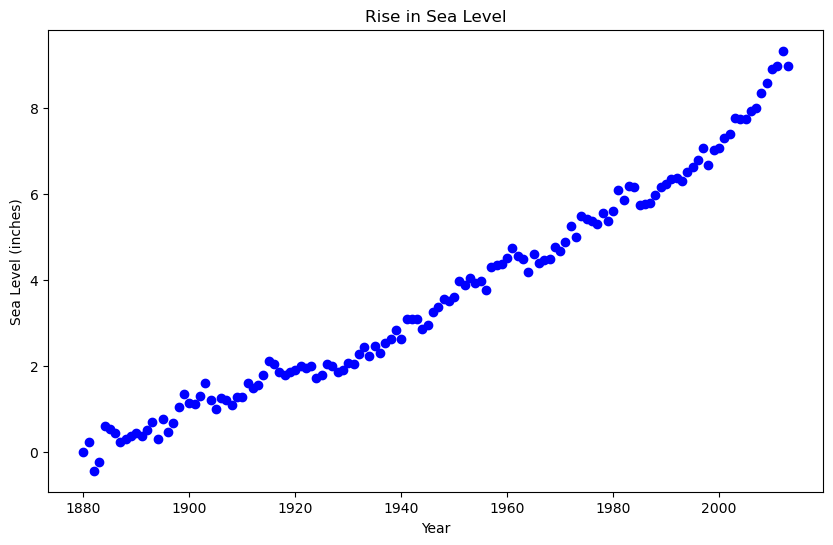

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue')
# Adding axis labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.show() # Showing the plot



3. linregress function from scipy.stats,scatter plot, predict the sea level rise in 2050.

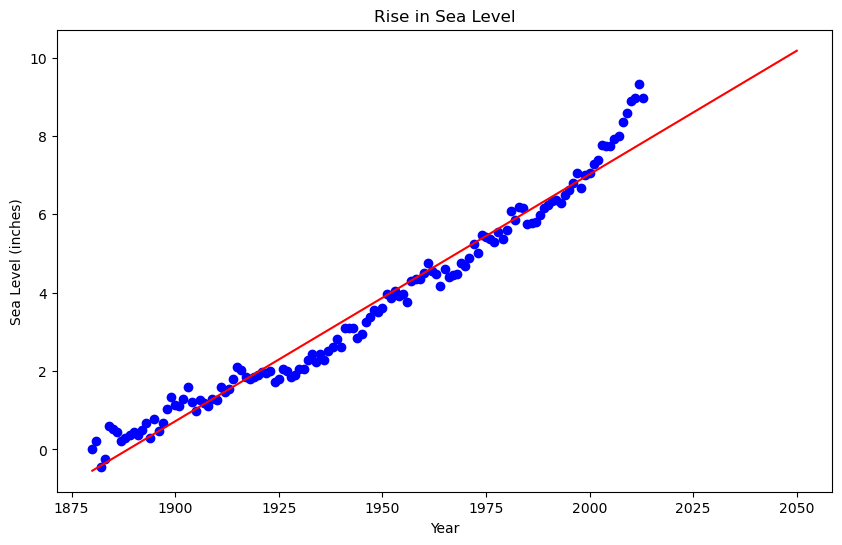

In [106]:
from scipy.stats import linregress

# Perform linear regression on all data
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

# Create x values for the line (from 1880 to 2050)
x_pred = pd.Series(range(1880, 2051))

# Compute the y values using the regression line equation: y = mx + b
y_pred = intercept + slope * x_pred

# Plot the line on top of the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue')
plt.plot(x_pred, y_pred, color='red')  # Line of best fit

# Labels again
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.show()

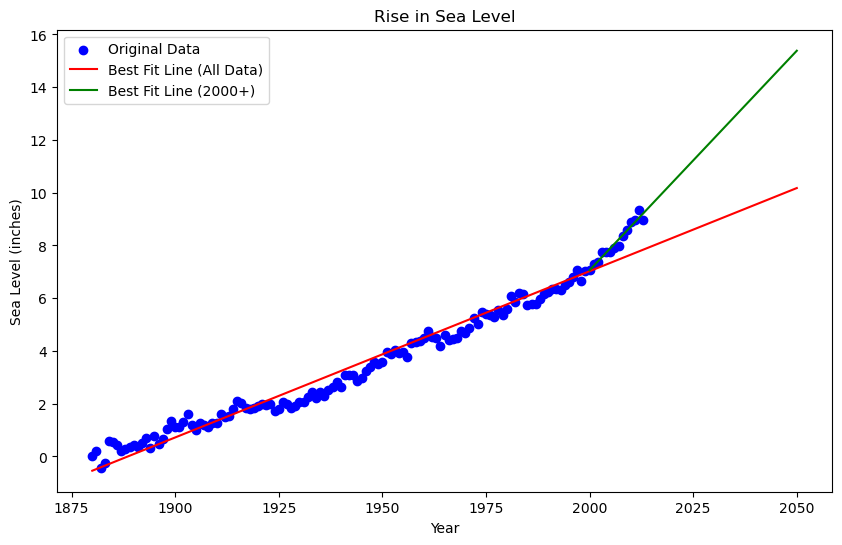

In [107]:
# Filtering data from year 2000 onward
df_recent = df[df['Year'] >= 2000]

# Linear regression on recent data
slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

# Predicting sea level from 2000 to 2050
x_recent = pd.Series(range(2000, 2051))
y_recent = intercept_recent + slope_recent * x_recent

# to Plot everything together
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Original Data')
plt.plot(x_pred, y_pred, 'red', label='Best Fit Line (All Data)')
plt.plot(x_recent, y_recent, 'green', label='Best Fit Line (2000+)')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

# Adding a legend to differentiate lines
plt.legend()

plt.show()
